<b><font size = '6'> k-Means Clustering | Shopping Centre Customer Segmentation </font>
</b>

* **Author:** Nthabiseng Seloana
* **Statement:**
  A shopping centre introduced membership cards that provide insight to user's age, gender, annual income and spending score which defined based on the parameters of customer bahviour and purchasing habits.

In [48]:
# This is required to prevent warnings from k-means in scikit-learn
import os
os.environ["OMP_NUM_THREADS"] = '1'

### Importing Libraries

+ Basic manipulation and processing:
  * numpy
  * pandas
  * IPython.display  - used to provide a better display of the pandas DataFrames
+ Data Visualization:
  * matplotlib
  * seaborn
  * mpl_toolkits.mplot3d
  * yellowbrick.cluster
+ Machine learning methods that will be utilized from the sklearn library:
  * sklearn.cluster for k-Means Clustering

In [49]:
import numpy as np
import pandas as pd

from IPython.display import display 

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

In [50]:
df = pd.read_csv('Mall_Customers.csv')

## Understanding the Data:
The following code will display the first few rows of data, the summary of the data and lastly, the general information of the dataset.

In [51]:
display(df.head(10))

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [106]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0
GenderCode,200.0,0.56,0.497633,0.0,0.00,1.0,1.00,1.0


In [53]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

In [54]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [55]:

gender_map = {'Male': 0, 'Female': 1}

df['GenderCode'] = df['Gender'].map(gender_map)

df = df.drop('Gender', axis=1)

display(df)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),GenderCode
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,1
197,198,32,126,74,0
198,199,32,137,18,0


### Performing Exploratory Data Analysis:
Creating Histogram plots and scatter plots using the seaborn library to visualize the clusters.

#### Histogram:

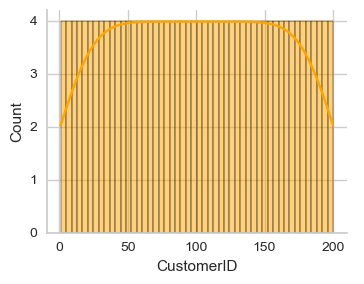

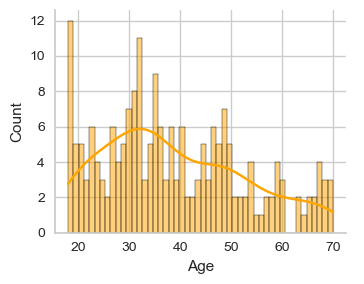

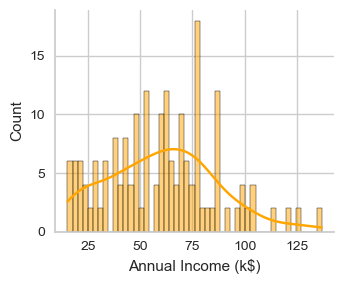

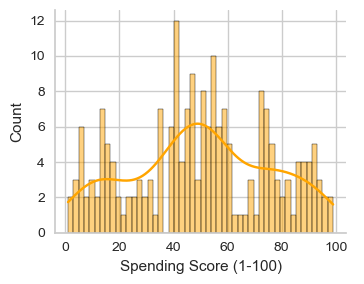

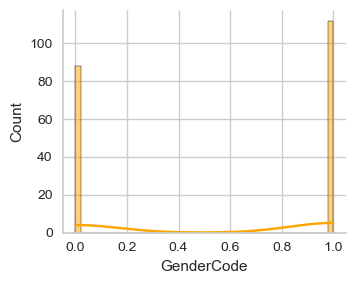

In [69]:
for x in df.columns:
    sns.FacetGrid(df, aspect=1.2).map(sns.histplot,x, bins=50, kde=True, color = "orange").add_legend()

#### Scatter Plot:

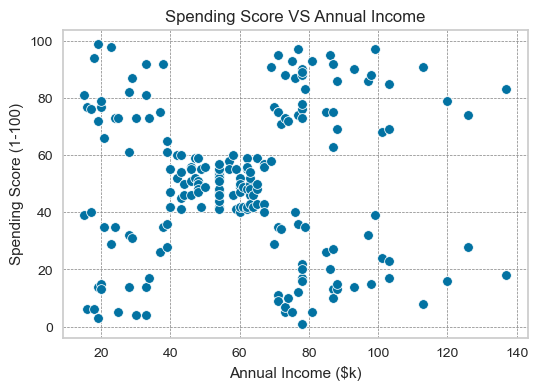

In [74]:
plt.figure(figsize=(6, 4))  
sns.scatterplot(data=df, y="Spending Score (1-100)", x="Annual Income (k$)")

plt.ylabel("Spending Score (1-100)")
plt.xlabel("Annual Income ($k)")
plt.title("Spending Score VS Annual Income")

plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  
plt.show()

Another way of visualizing the clusters is by creating a joint scatter plot

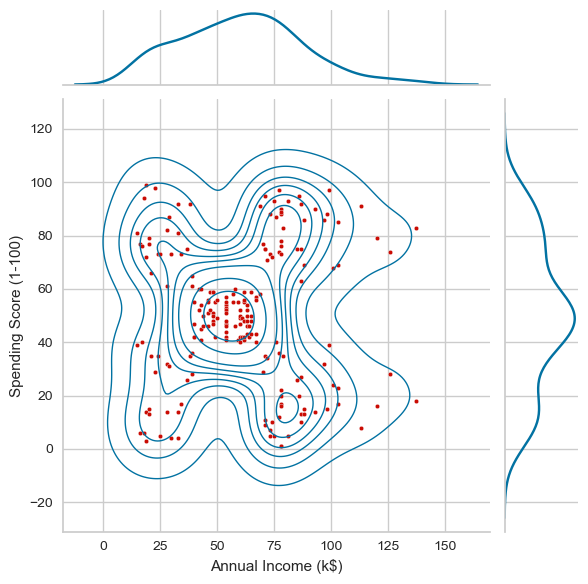

In [77]:
ax = sns.jointplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", kind="kde", levels=10, linewidths=1)
_ = sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", color = 'r', s=10)

The number of clusters can be determined using a visualizer from the yellow brick library called the k-Elbow Visualizer to find the valur of k.

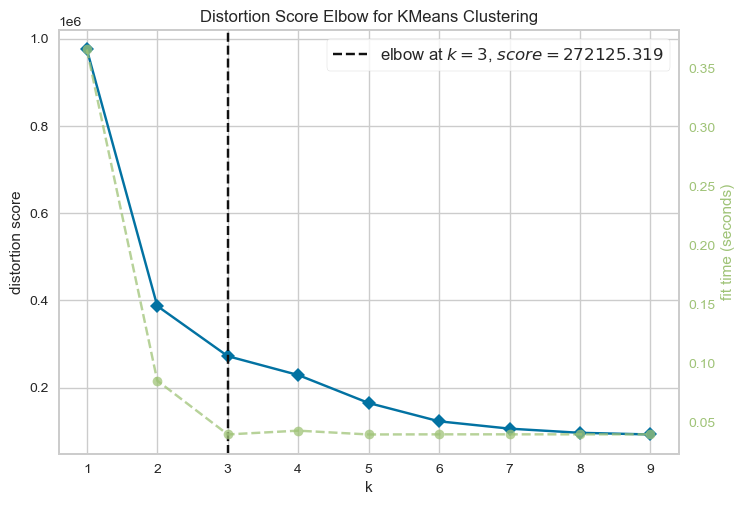

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
model = KMeans(random_state = 0)
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df)   
visualizer.poof()    

k =3; there are three clusters.

### Building a k-Means Model

In [89]:
k = 5
kmeans = KMeans(n_clusters=k)

clusters = kmeans.fit_predict(df)

df_clusters = df.copy()
df_clusters.insert(0,"Cluster", clusters)

### Visualization through a scatter plot:
Creating another joint scatter plot implementing different colours to get a better understanding of the different clusters in the data.

In [93]:
palette = sns.color_palette(palette='Set1')[0:k]

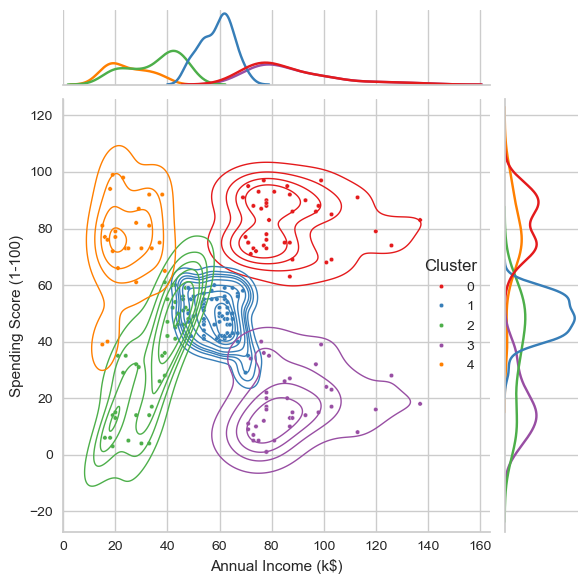

In [113]:
ax = sns.jointplot(data=df_clusters, x="Annual Income (k$)", y="Spending Score (1-100)", kind="kde", hue = "Cluster", levels=10, linewidths=1, palette=palette)
_ = sns.scatterplot(data=df_clusters, x="Annual Income (k$)", y="Spending Score (1-100)", hue = "Cluster", palette=palette, s=10)

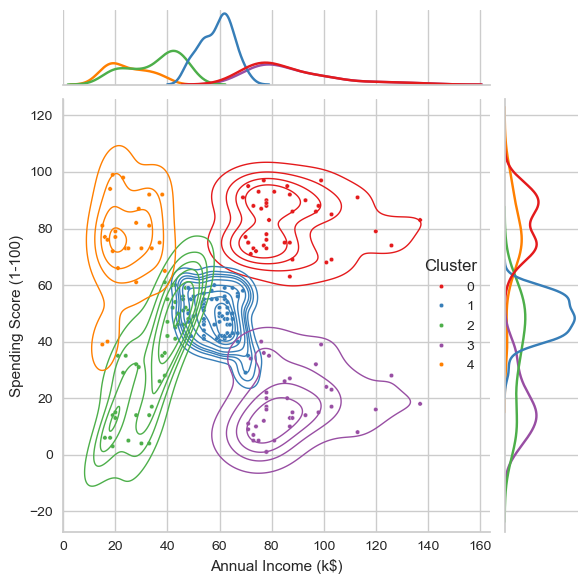

In [115]:
ax = sns.jointplot(data=df_clusters, x="Annual Income (k$)", y="Spending Score (1-100)", kind="kde", hue = "Cluster", levels=10, linewidths=1, palette=palette)
_ = sns.scatterplot(data=df_clusters, x="Annual Income (k$)", y="Spending Score (1-100)", hue = "Cluster", palette=palette, s=10)

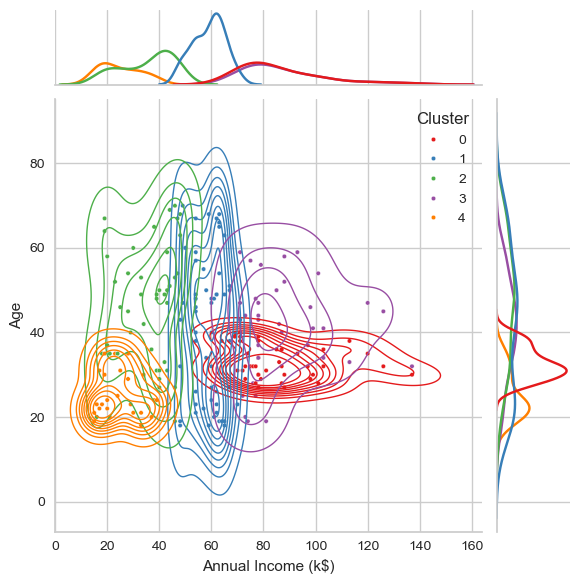

In [117]:
ax = sns.jointplot(data=df_clusters, x="Annual Income (k$)", y="Age", kind="kde", hue = "Cluster", levels=10, linewidths=1, palette=palette)
_ = sns.scatterplot(data=df_clusters, x="Annual Income (k$)", y="Age", hue = "Cluster", palette=palette, s=10)

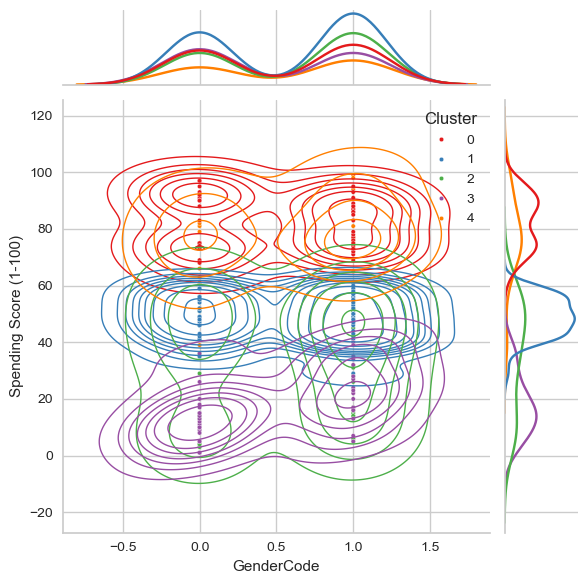

In [119]:
ax = sns.jointplot(data=df_clusters, x="GenderCode", y="Spending Score (1-100)", kind="kde", hue = "Cluster", levels=10, linewidths=1, palette=palette)
_ = sns.scatterplot(data=df_clusters, x="GenderCode", y="Spending Score (1-100)", hue = "Cluster", palette=palette, s=10)

Performing Statistical Analysis:

In [104]:
for no in np.sort(df_clusters["Cluster"].unique()):
    data = df_clusters[df_clusters["Cluster"]==no].drop("Cluster", axis='columns')
    print(f'CLUSTER {no}:')
    print(f'{data.mean()}')
    print('\n')

CLUSTER 0:
CustomerID                162.000000
Age                        32.692308
Annual Income (k$)         86.538462
Spending Score (1-100)     82.128205
GenderCode                  0.538462
dtype: float64


CLUSTER 1:
CustomerID                96.016949
Age                       41.559322
Annual Income (k$)        59.050847
Spending Score (1-100)    49.033898
GenderCode                 0.576271
dtype: float64


CLUSTER 2:
CustomerID                40.452381
Age                       46.857143
Annual Income (k$)        35.476190
Spending Score (1-100)    35.119048
GenderCode                 0.619048
dtype: float64


CLUSTER 3:
CustomerID                164.000000
Age                        40.805556
Annual Income (k$)         87.916667
Spending Score (1-100)     17.888889
GenderCode                  0.472222
dtype: float64


CLUSTER 4:
CustomerID                21.416667
Age                       25.250000
Annual Income (k$)        24.916667
Spending Score (1-100)    76.041667
Gen

### Cluster identification

In [109]:
cluster_map = {0: "High Income Middle Aged Men", 
               1: "High Income Youth Women", 
               2: "Middle Income Middle-Aged Women", 
               3: "Low Income Middle-Aged Women", 
               4: "Low Income Young Women", }
df_clusters['Cluster Label'] = df_clusters['Cluster'].map(cluster_map)
display(df_clusters.head())

,Cluster,CustomerID,Age,Annual Income (k$),Spending Score (1-100),GenderCode,Cluster Label
0,4,1,19,15,39,0,Low Income Young Women
1,4,2,21,15,81,0,Low Income Young Women
2,2,3,20,16,6,1,Middle Income Middle-Aged Women
3,4,4,23,16,77,1,Low Income Young Women
4,4,5,31,17,40,1,Low Income Young Women


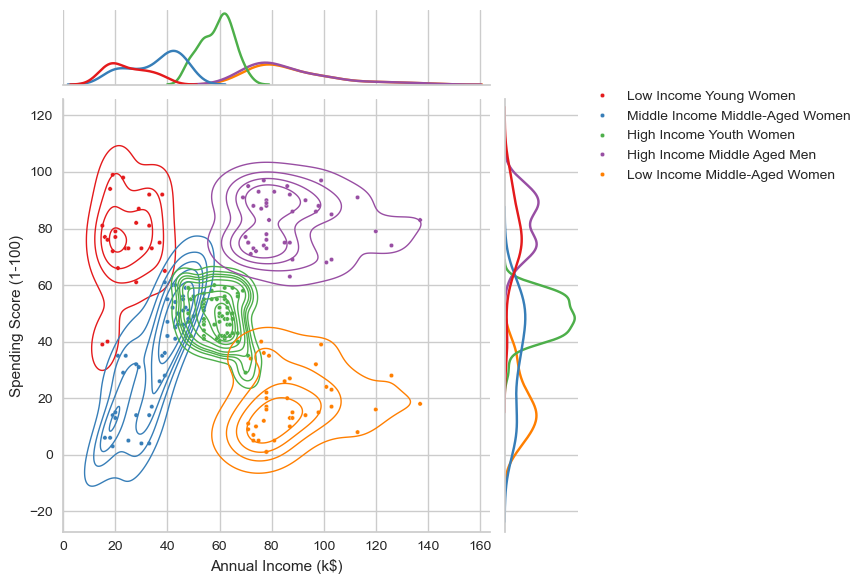

In [111]:
g = sns.jointplot(data=df_clusters, 
                  x="Annual Income (k$)", 
                  y="Spending Score (1-100)", 
                  kind="kde", 
                  hue = "Cluster Label", 
                  levels=10, linewidths=1, palette=palette)

_ = sns.scatterplot(data=df_clusters, 
                    x="Annual Income (k$)", 
                    y="Spending Score (1-100)", 
                    hue = "Cluster Label", 
                    palette=palette, s=10)
plt.legend(bbox_to_anchor=(1.2, 1.05))
plt.show()